In [1]:
from qiskit import *
import numpy as np 
from qiskit.tools.visualization import plot_histogram

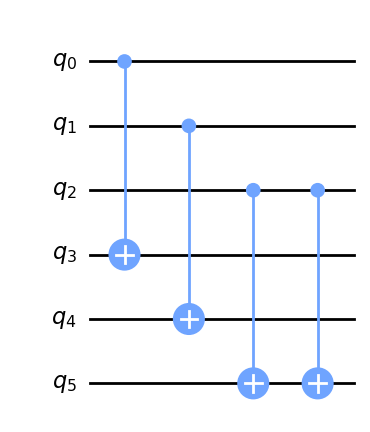

In [2]:
n=3
circuit= QuantumCircuit(2*n)

# cc is the secret code of the oracle (black box)
cc='100';
p=int(n/2);
for i in range(n):
    circuit.cx(i,i+n)
k=0
for i in range (n-1,-1,-1):
    if cc[i]=='1':
        m=n
        for j in range(n-1,-1,-1):
            if cc[j]=='1':
                circuit.cx(k,m)
            m+=1
        break
    k+=1

circuit.draw(output='mpl')

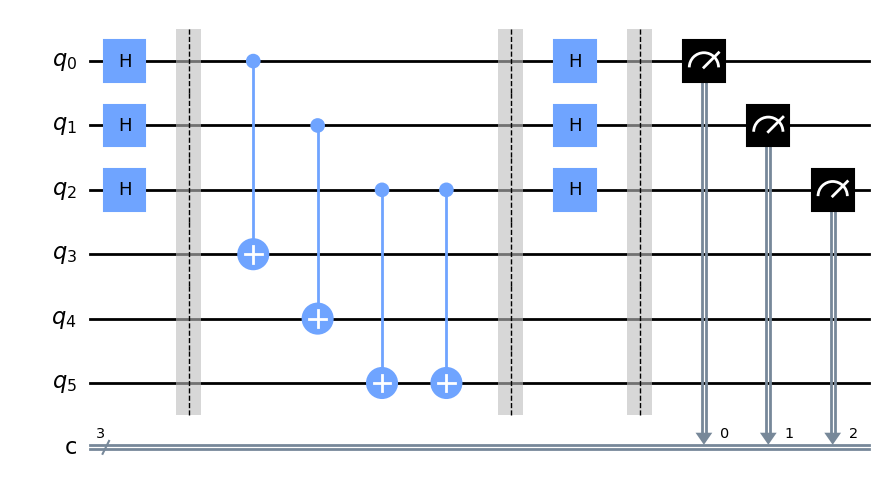

In [3]:
simon = QuantumCircuit(2*n,n)

for qubit in range(n):
    simon.h(qubit)
simon.barrier()

simon = simon.compose(circuit)
simon.barrier()

for qubit in range(n):
    simon.h(qubit)
simon.barrier()

for qubit in range (n):
    simon.measure(qubit,qubit)
simon. draw(output='mpl')

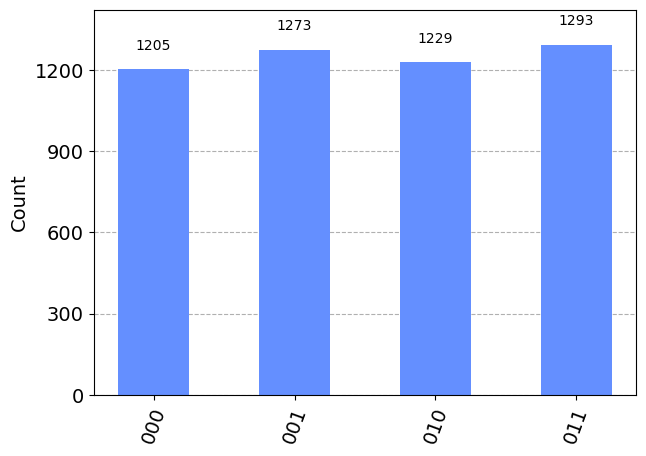

In [4]:
simulator = BasicAer.get_backend('qasm_simulator')
shots=5000
noisy_results=execute(simon, backend=simulator, shots= shots).result()
noisy_counts= noisy_results.get_counts()
plot_histogram(noisy_counts)
